In [10]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from IPython.display import SVG
from tensorflow.keras.layers import Dense, BatchNormalization
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.utils import np_utils
from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
import seaborn as sns
import matplotlib.pyplot as plt
from keras.optimizers import Adam 
# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)


x_train shape: (60000, 28, 28) y_train shape: (60000,)
60000 train set
10000 test set
y = 2 Pullover


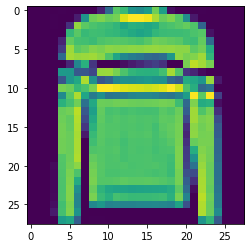

In [11]:
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training and test datasets
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

# Image index, you can pick any number between 0 and 59,999
img_index = 5
# y_train contains the lables, ranging from 0 to 9
label_index = y_train[img_index]
# Print the label, for example 2 Pullover
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
# # Show one of the images from the training dataset
plt.imshow(x_train[img_index])

In [12]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [13]:
print("Number of train data - " + str(len(x_train)))
print("Number of test data - " + str(len(x_test)))

Number of train data - 60000
Number of test data - 10000


In [14]:
# Further break training data into train / validation sets (# put 5000 into validation set and keep remaining 55,000 for train)
(x_train, x_valid) = x_train[5000:], x_train[:5000] 
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Print training set shape
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training, validation, and test datasets
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)
55000 train set
5000 validation set
10000 test set


In [15]:
model = tf.keras.Sequential()
#1BLOK
model.add(Conv2D(input_shape=x_train[0].shape,filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(input_shape=x_train[0].shape,filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization(momentum=0.9))
#2.BLOK
model.add(Conv2D(input_shape=x_train[0].shape,filters=128,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(input_shape=x_train[0].shape,filters=128,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization(momentum=0.9))
 #3.BLOK
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization(momentum=0.9))
#4.BLOK
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization(momentum=0.9))
#5.BLOK
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization(momentum=0.9))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(4096, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Take a look at the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 14, 14, 64)        256       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 128)        

In [16]:
optimizer = tf.optimizers.Adam(lr=0.001)
model.compile(optimizer=optimizer,loss='categorical_crossentropy',
             metrics=['accuracy'])

In [17]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
hist=model.fit(x_train,
         y_train,
         batch_size=128,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])


Epoch 1/10
430/430 [==============================] - ETA: 0s - loss: 0.5195 - accuracy: 0.8117
Epoch 00001: val_loss improved from inf to 0.32999, saving model to model.weights.best.hdf5
430/430 [==============================] - 2639s 6s/step - loss: 0.5195 - accuracy: 0.8117 - val_loss: 0.3300 - val_accuracy: 0.8820
Epoch 2/10
430/430 [==============================] - ETA: 0s - loss: 0.3153 - accuracy: 0.8891
Epoch 00002: val_loss improved from 0.32999 to 0.31280, saving model to model.weights.best.hdf5
430/430 [==============================] - 2730s 6s/step - loss: 0.3153 - accuracy: 0.8891 - val_loss: 0.3128 - val_accuracy: 0.8898
Epoch 3/10
430/430 [==============================] - ETA: 0s - loss: 0.2997 - accuracy: 0.8964
Epoch 00003: val_loss improved from 0.31280 to 0.24072, saving model to model.weights.best.hdf5
430/430 [==============================] - 2593s 6s/step - loss: 0.2997 - accuracy: 0.8964 - val_loss: 0.2407 - val_accuracy: 0.9142
Epoch 4/10
430/430 [=========

In [8]:
# Load the weights with the best validation accuracy
model.load_weights('model.weights.best.hdf5')

NameError: name 'model' is not defined

In [21]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n','Loss:',score[0])
print('\n', 'Test accuracy:', score[1])


 Loss: 0.21160942316055298

 Test accuracy: 0.9287999868392944


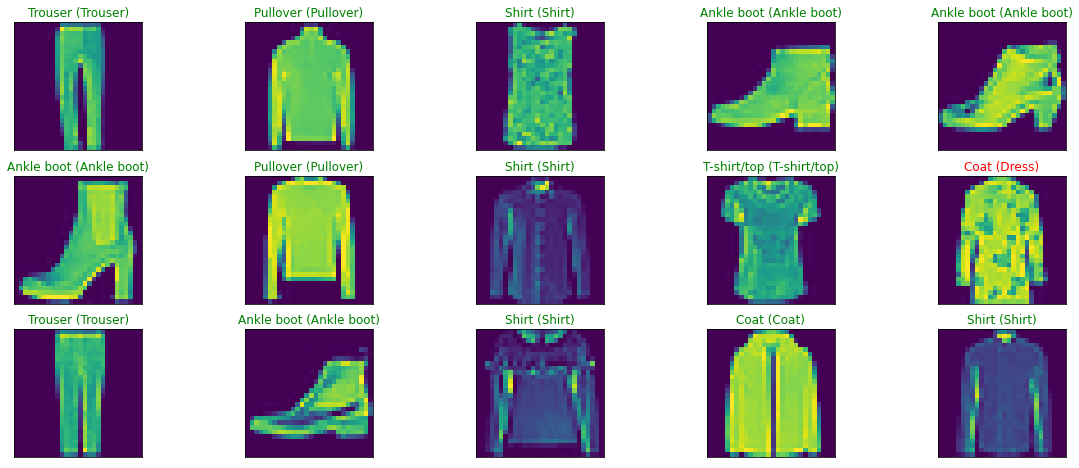

In [20]:
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

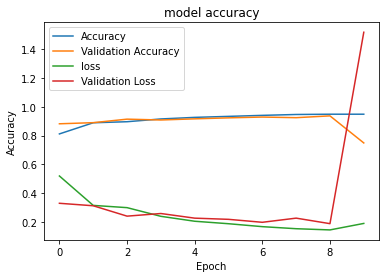

In [23]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()